In [74]:
import numpy as np
import pandas as pd

np.random.seed(27)

In [75]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
print("Training data dimensions =", train.shape)
print("Testing data dimensions =", test.shape)

Training data dimensions = (2000, 5)
Testing data dimensions = (200, 4)


In [76]:
train.head()

,T,V,P,RH,E
0,273.39,420.12,91.84,57.41,1778.12
1,195.26,248.88,92.29,35.21,1824.16
2,377.52,360.42,92.31,27.69,1761.72
3,171.60,244.98,91.61,56.99,1889.64
4,222.56,353.70,92.43,54.25,1806.68


In [77]:
y_train = train.pop('E')

In [78]:
train_rows = train.shape[0]
data = pd.concat([train, test])

del train
del test

In [79]:
'''from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
for c in data.columns:
    data[c] = sc.fit_transform(data[[c]])
    '''

'from sklearn.preprocessing import MinMaxScaler\n\nsc = MinMaxScaler()\nfor c in data.columns:\n    data[c] = sc.fit_transform(data[[c]])\n    '

In [80]:
train = data[:train_rows]
test = data[train_rows:]

del data

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib notebook

<IPython.core.display.Javascript object>


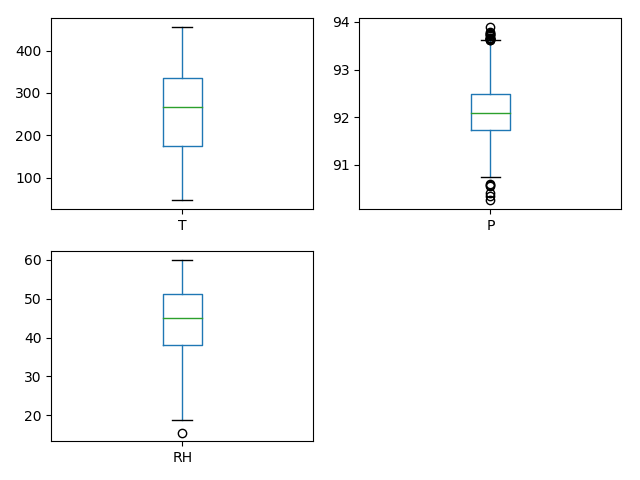

In [82]:
train.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(2, 2))
plt.tight_layout()

<IPython.core.display.Javascript object>


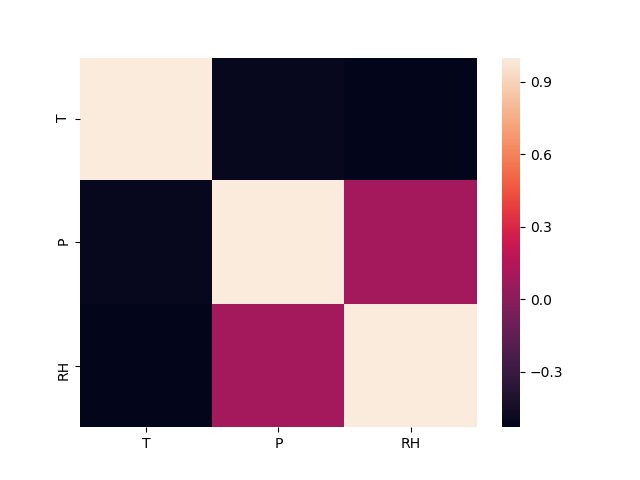

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=1)
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

hyper_params = [{'n_estimators':[10, 50, 100]}]
forest = RandomForestRegressor()

gs = GridSearchCV(estimator=forest,
                  param_grid=hyper_params,
                  scoring='r2',
                  cv=10
                 )

In [85]:
gs.fit(train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [86]:
model = gs.best_estimator_

In [87]:
from sklearn.metrics import r2_score

r2_score(y_train, model.predict(train))

0.98970061655060881

In [88]:
predictions = model.predict(test)

In [89]:
predictions

array([ 1816.3464,  1809.9172,  1901.5988,  1902.776 ,  1793.384 ,
        1759.9076,  1737.0576,  1818.1576,  1733.5708,  1773.0712,
        1792.6592,  1861.2352,  1916.2792,  1907.9956,  1933.1176,
        1818.0944,  1758.9028,  1763.6336,  1865.35  ,  1758.6604,
        1728.5164,  1785.3224,  1788.8324,  1769.0064,  1820.8064,
        1799.5888,  1863.4372,  1809.53  ,  1874.0912,  1750.1184,
        1912.6728,  1823.4736,  1770.4992,  1789.0696,  1766.098 ,
        1805.4304,  1784.1676,  1899.0236,  1873.8928,  1890.9152,
        1759.1248,  1769.9696,  1892.224 ,  1809.9156,  1802.8104,
        1754.1568,  1749.5204,  1771.8376,  1762.4308,  1788.8504,
        1927.5556,  1883.5356,  1908.7996,  1865.1292,  1773.5468,
        1760.6844,  1934.764 ,  1851.7276,  1870.928 ,  1724.0136,
        1856.2036,  1776.0812,  1800.708 ,  1905.7764,  1851.0752,
        1858.8312,  1883.7956,  1777.3808,  1737.9912,  1765.6572,
        1868.9128,  1732.4716,  1858.2264,  1823.4144,  1842.3

In [90]:
predictions = pd.DataFrame({'E': predictions})
predictions.to_csv('RF_submission.csv', index=False, header=False)